# Simplex aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Simplex à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método de busca Simplex é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Plotando a função

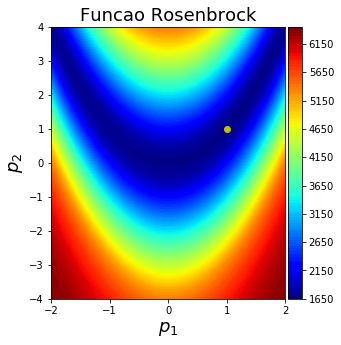

In [2]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-2., 2., np1)
p2 = np.linspace(-4., 4., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1.)*(p1 - 1.)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1.)*(p0[0] - 1.)
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - vetor gradiente calculado em cada ponto (p1, p2)
    '''
    grad = np.zeros(2)
    grad[0] = -400.*p0[0]*(p0[1] - p0[0]*p0[0]) + 2.*(p0[0] - 1.) 
    grad[1] = 200.*(p0[1] - p0[0]*p0[0])

    return grad

In [4]:
# chute inicial
p0 = np.array([-1.9,-3.9,-1.5, -3.5, -1.2, -3.2]) 
p0 = np.reshape(p0, (3,2))


f1 = rosenbrock(p0[0])
f2 = rosenbrock(p0[1])
f3 = rosenbrock(p0[2])
    
f0 = np.array([f1, f2, f3])

iH = np.argmax(f0)
iL = np.argmin(f0)

p1_list = [p0[iL][0]]
p2_list = [p0[iL][1]]
f_list = [f0[iL]]

alfa = 1.
gamma = 2.
beta = 0.5

itmax = 100

In [6]:
pi = np.delete(p0, [iH, iL], 0)
print pi.shape

(1, 2)


# Algoritmo Simplex

In [7]:
for it in range(itmax):
    #p0_movie = np.vstack((p0, p0[0,:]))
    #plot
    #plt.figure(figsize=(5,5))
    #plt.plot(1., 1., 'oy')
    #plt.plot(p1_list, p2_list, '.w-', markersize=4)
    #plt.plot(p0_movie[:,0], p0_movie[:,1], 'o-k', markersize=8)
    #plt.title('SD com Armijo - Rosenbrock', fontsize=18)
    #plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
    #plt.xlabel('$p_1$', fontsize=18)
    #plt.ylabel('$p_2$', fontsize=18)
    #plt.colorbar(pad=0.01, aspect=20, shrink=1)
    #plt.savefig('simplex_snap'+str(it)+'.png', pad_inches=0.0)
    
    # etapa 2: calcula f para cada par de parâmetros
    f1 = rosenbrock(p0[0])
    f2 = rosenbrock(p0[1])
    f3 = rosenbrock(p0[2])

    f0 = np.array([f1, f2, f3])
    
    # etapa 3: defini-se os valores máximo e mínimo
    iH = np.argmax(f0)
    iL = np.argmin(f0)
    
    fH = f0[iH]
    fL = f0[iL]
    fi = np.delete(f0, [iH, iL], 0)
    
    pH = p0[iH]
    pL = p0[iL]
    pi = np.delete(p0, [iH, iL], 0)
    print pi, iH, iL
    pi = np.reshape(pi, (2,1))
    
    p0d = np.delete(p0, iH, 0)
    f0d = np.delete(f0, iH, 0)
    # etapa 4: caçcula o centróide
    pC = 0.5*(p0d[0] + p0d[1])
    
    # etapa 5: reflexão
    pR = pC + alfa*(pC - pH)
    #print pH, pL, pi, pC, pR
    
    # etapa 6: calcula fR
    fR = rosenbrock(pR)
    #print fH, fL, fi, fR
    
    # etapa 6a
    if fR < fL:
        pE = pC + gamma*(pR - pC)
        fE = rosenbrock(pE)
        # etapa 6a caso 1
        if fE <= fi:
            pH = pE.copy()
            p = np.vstack((p0d, pE))
            f = np.hstack((f0d, fE))
        # etapa 6a caso 2
        else:
            pH = pR.copy()
            p = np.vstack((p0d, pR))
            f = np.hstack((f0d, fR))
    # etapa 6b
    elif fL <= fR and fR < fi:
        #print fL
        pH = pR.copy()
        p = np.vstack((p0d, pR))
        f = np.hstack((f0d, fR))
    # etapa 6c
    elif fR > f0d.all():
        pcon = pC + beta*(pH - pC)
        fcon = rosenbrock(pcon)
        #print pcon, fcon
        # etapa 6c caso 1a
        if fcon < fR:
            #print fcon, fR
            pH = pcon.copy()
            p = np.vstack((p0d, pcon))
            f = np.hstack((f0d, fcon))
        # etapa 6c caso 1b
        elif fcon >= fR:
            pcond = 0.5*(pi + pL)
            fcond = rosenbrock(pcond)
            pH = pcond.copy()
            p = np.vstack((p0d, pcond))
            f = np.hstack((f0d, fcond))
    # etapa 6c caso 2a
    elif fR < fH:
        pH = pcon.copy()
        p = np.vstack((p0d, pcon))
        f = np.hstack((f0d, fcon))
    # etapa 6c caso 2b
    elif fR > fH:
        #print pi
        pcond = 0.5*(pi + pH)
        fcond = rosenbrock(pcond)
        pH = pcond.copy()
        p = np.vstack((p0d, pcond))
        f = np.hstack((f0d, fcond))
        
    #print p
    print f
    print abs((np.max(f) - np.min(f0))/np.min(f0))
    # printa os valores
    print 'iteração: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (it, pL[0], pL[1], np.min(f))
    p1_list.append(pL[0])
    p2_list.append(pL[1])
    f_list.append(fL)
    
    if (abs((np.sum(f) - fL)/fL) <= 1e-8):
        break
    else:
        # atualizando parâmetros
        p0 = p.copy()
        f0 = f.copy()
        #d0 = d
        #res0 = res
        #phi0 = phi
        #prim0 = pris

[[-1.5 -3.5]] 0 2
[ 3312.5       2157.8        536.328125]
0.535128371489
iteração:   0   p1: -1.20   p2: -3.20   f: 5.36e+02
[[-1.2 -3.2]] 0 2
[ 2157.8          536.328125     344.36503906]
3.02328332119
iteração:   1   p1: -0.25   p2: -2.25   f: 3.44e+02
[[-0.25 -2.25]] 0 2
[ 536.328125    344.36503906  712.03089371]
1.06766312761
iteração:   2   p1: 0.82   p2: -1.18   f: 3.44e+02
[[-0.25 -2.25]] 2 1
[ 536.328125    344.36503906  412.9954567 ]
0.557440692761
iteração:   3   p1: 0.82   p2: -1.18   f: 3.44e+02
[[ 1.03125 -0.96875]] 0 1
[ 344.36503906  412.9954567   315.81923155]
0.199295543531
iteração:   4   p1: 0.82   p2: -1.18   f: 3.16e+02
[[ 0.825 -1.175]] 1 2
[ 344.36503906  315.81923155  340.08148873]
0.0903865397101
iteração:   5   p1: 0.34   p2: -1.66   f: 3.16e+02
[[ 0.80664062 -1.19335938]] 0 1
[ 315.81923155  340.08148873  318.06636886]
0.0768232417853
iteração:   6   p1: 0.34   p2: -1.66   f: 3.16e+02
[[ 0.32070312 -1.67929688]] 1 0
[ 315.81923155  318.06636886  308.069450

ValueError: total size of new array must be unchanged

In [8]:
print p0

[[ 0.50142451 -1.49857549]
 [ 0.50142449 -1.49857551]
 [ 0.5014245  -0.4985755 ]
 [-0.4985755  -1.4985755 ]]


In [ ]:
#plot
plt.figure(figsize=(5,5))
#for i in range(3):
#plt.plot(p0[:,0], p0[:,1], 'o-k', markersize=6)
#plt.plot(p0[3:-1,0], p0[3:-1,1], 'o-k', markersize=6)
plt.plot(1., 1., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=6)
plt.title('SD com Armijo - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock_Armijo.png', pad_inches=0.0)
plt.show()

In [ ]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(f_list, 'o')
plt.savefig('convergence.png', dpi=300)
plt.show()